<a href="https://colab.research.google.com/github/cosmo3769/HubMAP-HPA/blob/eda/EDA_HuBMAP_HPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Setting up kaggle service to fetch the dataset

Go to your kaggle account. Generate an API token. The file named "kaggle.json" will be downloaded to your local system. Upload the file **kaggle.json** in the colab so to use the kaggle service in colab.  

In [2]:
# Install the kaggle library.

%%capture
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c hubmap-organ-segmentation

100% 5.76G/5.78G [00:36<00:00, 194MB/s]
100% 5.78G/5.78G [00:36<00:00, 170MB/s]


In [7]:
%%capture
! unzip hubmap-organ-segmentation.zip

# Dataset Exploration


In [8]:
train_df = pd.read_csv("/content/train.csv")
train_df

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


### Function to label the bar graph

In [65]:
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        if type(x[idx]) == int:
          ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                  [x[idx], y[idx]],
                  ha='center', va='bottom', rotation=90)
        else:
          ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                  [x[idx], y[idx]],
                  ha='center', va='bottom', rotation=0)

### Organs Distribution

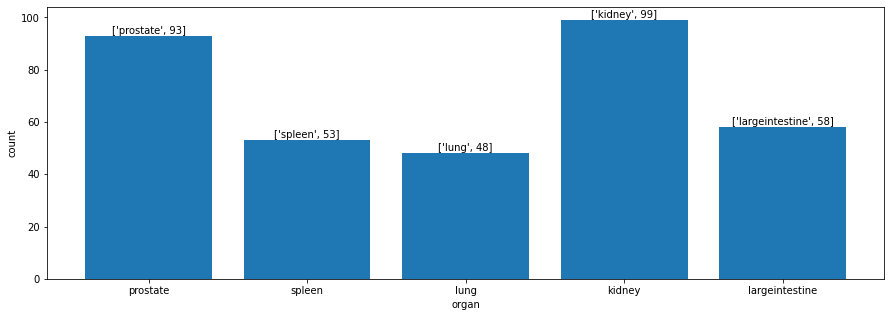

In [66]:
fig, ax = plt.subplots(figsize=(15, 5))

x = list(train_df['organ'].unique())
y = list(train_df['organ'].value_counts(sort=False))

bar_plot = plt.bar(x, y)
autolabel(bar_plot)
plt.xlabel('organ')
plt.ylabel('count')
plt.show()

### Age Distribution

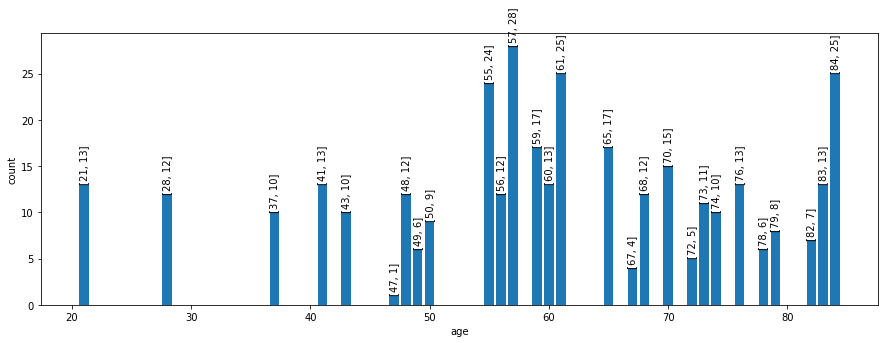

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))

x = list(map(int, train_df['age'].unique()))
y = list(train_df['age'].value_counts(sort=False))

bar_plot = plt.bar(x, y)
autolabel(bar_plot)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

### Gender Distribution

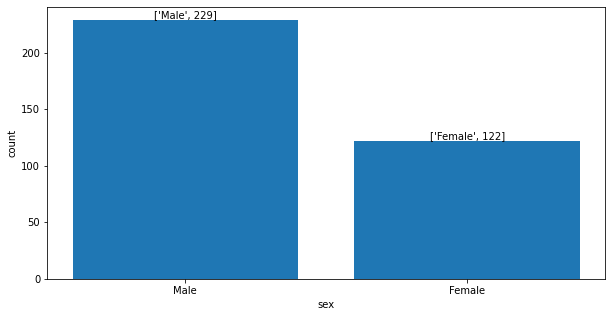

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))

x = list(train_df['sex'].unique())
y = list(train_df['sex'].value_counts(sort=False))

bar_plot = plt.bar(x, y)
autolabel(bar_plot)
plt.xlabel('sex')
plt.ylabel('count')
plt.show()